### The advanced visualisation was done on a different EC2 machine, hence a differnt file. The cleaned data frame was stored and loaded to perfom the visualisation

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
event_train = pd.read_csv('event_train_30Jan.csv')
event_train.head()

,Unnamed: 0,Event_id,Device_id,TimeStamp,Longitude,Latitude,Hour,WeekDay,Cluster_label
0,0,1180629,-9222956879900150000,2016-05-06 15:31:56,113.24,23.19,15,4,0
1,1,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,15,4,0
2,2,2807359,-9222956879900150000,2016-05-06 15:32:54,113.24,23.19,15,4,0
3,3,2085015,-9222956879900150000,2016-05-06 15:33:24,113.24,23.19,15,4,0
4,4,229087,-9222956879900150000,2016-05-06 15:33:50,113.24,23.19,15,4,0


In [3]:
del event_train['Unnamed: 0']

In [4]:
event_train.head()

,Event_id,Device_id,TimeStamp,Longitude,Latitude,Hour,WeekDay,Cluster_label
0,1180629,-9222956879900150000,2016-05-06 15:31:56,113.24,23.19,15,4,0
1,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,15,4,0
2,2807359,-9222956879900150000,2016-05-06 15:32:54,113.24,23.19,15,4,0
3,2085015,-9222956879900150000,2016-05-06 15:33:24,113.24,23.19,15,4,0
4,229087,-9222956879900150000,2016-05-06 15:33:50,113.24,23.19,15,4,0


In [10]:
non_event_train = pd.read_csv('non_event_train_final_1.csv')
non_event_train.head()

,Unnamed: 0,Device_id,Gender,Phone_Brand,event_present,Time_active(s),Longitude_diff,Latitude_diff,Avg_active_app,Avg_applications,Label,Count_Events,Cluster_label,Most_active_hour,Most_active_week,Age_Group,train_test_flag
0,0,-1819925713085810000,0,6,Yes,8182,0.0,0.0,5.425,6.425000,21,40,4513,0,0,1,train
1,1,3670076507269740000,1,5,Yes,2682,0.0,0.0,2.000,5.333333,21,111,9909,0,0,3,train
2,2,5333872006968810000,1,10,Yes,4140,0.0,0.0,4.600,12.933333,21,15,8047,0,5,3,train
3,3,4216041491117040000,1,16,Yes,0,0.0,0.0,2.000,37.285714,21,7,9909,17,1,3,train
4,4,-3441149835823130000,1,3,Yes,0,0.0,0.0,2.000,15.300000,21,10,9909,6,1,2,train


In [11]:
del non_event_train['Unnamed: 0']

In [12]:
non_event_train.head()

,Device_id,Gender,Phone_Brand,event_present,Time_active(s),Longitude_diff,Latitude_diff,Avg_active_app,Avg_applications,Label,Count_Events,Cluster_label,Most_active_hour,Most_active_week,Age_Group,train_test_flag
0,-1819925713085810000,0,6,Yes,8182,0.0,0.0,5.425,6.425000,21,40,4513,0,0,1,train
1,3670076507269740000,1,5,Yes,2682,0.0,0.0,2.000,5.333333,21,111,9909,0,0,3,train
2,5333872006968810000,1,10,Yes,4140,0.0,0.0,4.600,12.933333,21,15,8047,0,5,3,train
3,4216041491117040000,1,16,Yes,0,0.0,0.0,2.000,37.285714,21,7,9909,17,1,3,train
4,-3441149835823130000,1,3,Yes,0,0.0,0.0,2.000,15.300000,21,10,9909,6,1,2,train


In [13]:
new_df = pd.merge(event_train, non_event_train, how='inner', on='Device_id')

In [14]:
new_df.head()

,Event_id,Device_id,TimeStamp,Longitude,Latitude,Hour,WeekDay,Cluster_label_x,Gender,Phone_Brand,...,Latitude_diff,Avg_active_app,Avg_applications,Label,Count_Events,Cluster_label_y,Most_active_hour,Most_active_week,Age_Group,train_test_flag
0,1180629,-9222956879900150000,2016-05-06 15:31:56,113.24,23.19,15,4,0,1,18,...,0.0,10.923077,23.138462,21,65,0,15,5,3,train
1,1650018,-9222956879900150000,2016-05-06 15:32:26,113.24,23.19,15,4,0,1,18,...,0.0,10.923077,23.138462,21,65,0,15,5,3,train
2,2807359,-9222956879900150000,2016-05-06 15:32:54,113.24,23.19,15,4,0,1,18,...,0.0,10.923077,23.138462,21,65,0,15,5,3,train
3,2085015,-9222956879900150000,2016-05-06 15:33:24,113.24,23.19,15,4,0,1,18,...,0.0,10.923077,23.138462,21,65,0,15,5,3,train
4,229087,-9222956879900150000,2016-05-06 15:33:50,113.24,23.19,15,4,0,1,18,...,0.0,10.923077,23.138462,21,65,0,15,5,3,train


In [15]:
new_df.shape

(1196940, 23)

In [16]:
new_df.columns

Index([u'Event_id', u'Device_id', u'TimeStamp', u'Longitude', u'Latitude',
       u'Hour', u'WeekDay', u'Cluster_label_x', u'Gender', u'Phone_Brand',
       u'event_present', u'Time_active(s)', u'Longitude_diff',
       u'Latitude_diff', u'Avg_active_app', u'Avg_applications', u'Label',
       u'Count_Events', u'Cluster_label_y', u'Most_active_hour',
       u'Most_active_week', u'Age_Group', u'train_test_flag'],
      dtype='object')

In [17]:
new_df.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [18]:
new_df['Gender']= new_df['Gender'].apply(lambda x : 'M' if x== 1 else 'F')
new_df.Gender.head()

0    M
1    M
2    M
3    M
4    M
Name: Gender, dtype: object

In [19]:
def age_grouping(x):
    if (x == 1 ):
        return '0-24'
    elif (x == 2):
        return '25-32'
    else:
        return '32+'
new_df['Age_Group']= new_df['Age_Group'].apply( lambda x: age_grouping(x))

new_df['Age_Group'].head()

0    32+
1    32+
2    32+
3    32+
4    32+
Name: Age_Group, dtype: object

In [20]:
new_df[['Gender', 'Longitude', 'Latitude', 'Age_Group']].head()

,Gender,Longitude,Latitude,Age_Group
0,M,113.24,23.19,32+
1,M,113.24,23.19,32+
2,M,113.24,23.19,32+
3,M,113.24,23.19,32+
4,M,113.24,23.19,32+


In [21]:
new_df[['Gender', 'Longitude', 'Latitude', 'Age_Group']].groupby(['Gender']).count()

,Longitude,Latitude,Age_Group
Gender,,,
F,346193,346193,346193
M,850747,850747,850747


In [25]:
## randomly selecting 1 lakh rows
temp_df= new_df.sample(100000)

In [26]:
temp_df.shape

(100000, 23)

In [27]:
print(temp_df.Longitude.median())
print(temp_df.Latitude.median())

113.96
30.39


### Using the median value of Latitude and Longitude, we found out that the co-ordinates belongs to China. Hence giving the domain value as that of China's

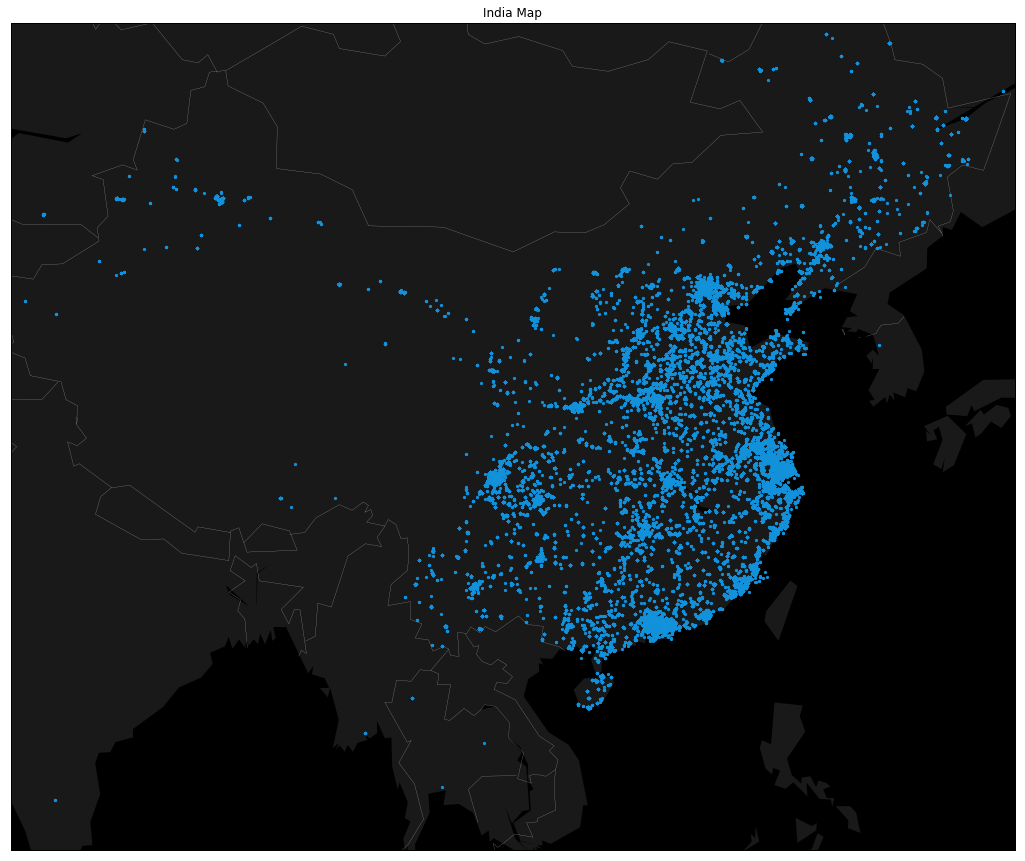

In [28]:
## The above median value for latitude and longitude belongs to CHina region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df["Longitude"].tolist(), temp_df["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India Map")
plt.show()

#### Visualization for Male Category

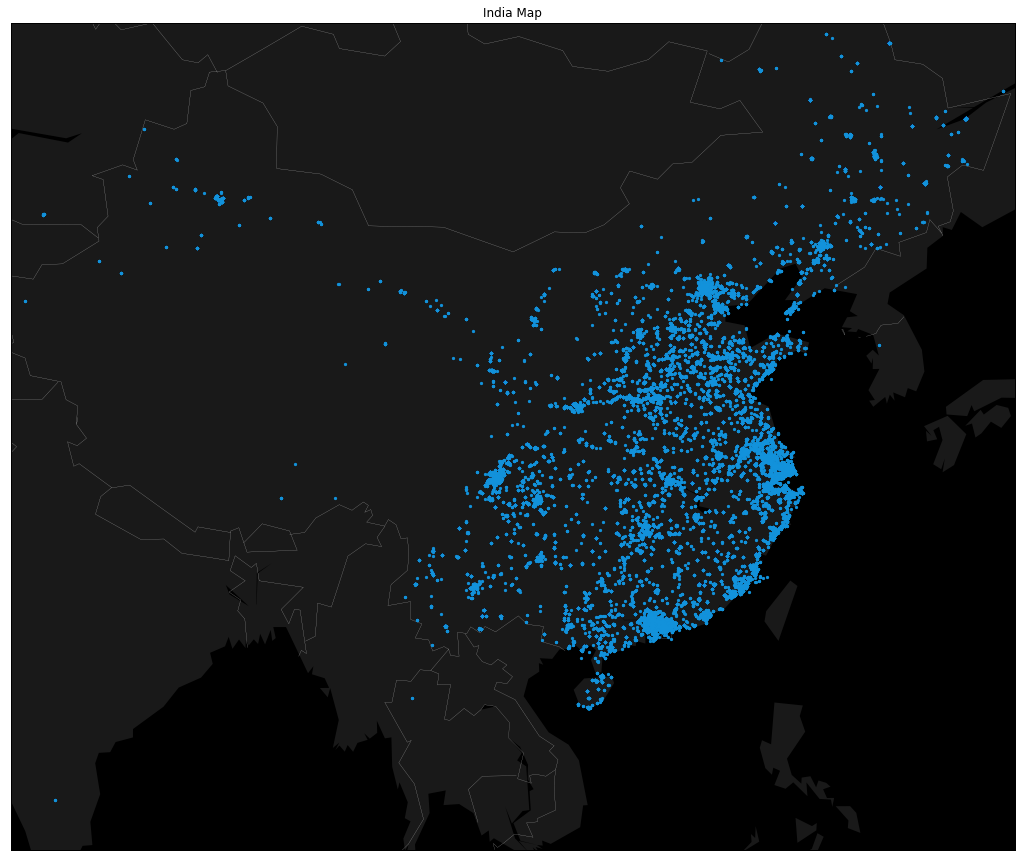

In [32]:
## The above median value for latitude and longitude belongs to China region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df[temp_df['Gender']=='M']["Longitude"].tolist(), temp_df[temp_df['Gender']=='M']["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("Map")
plt.show()

#### Visualization for Female Category

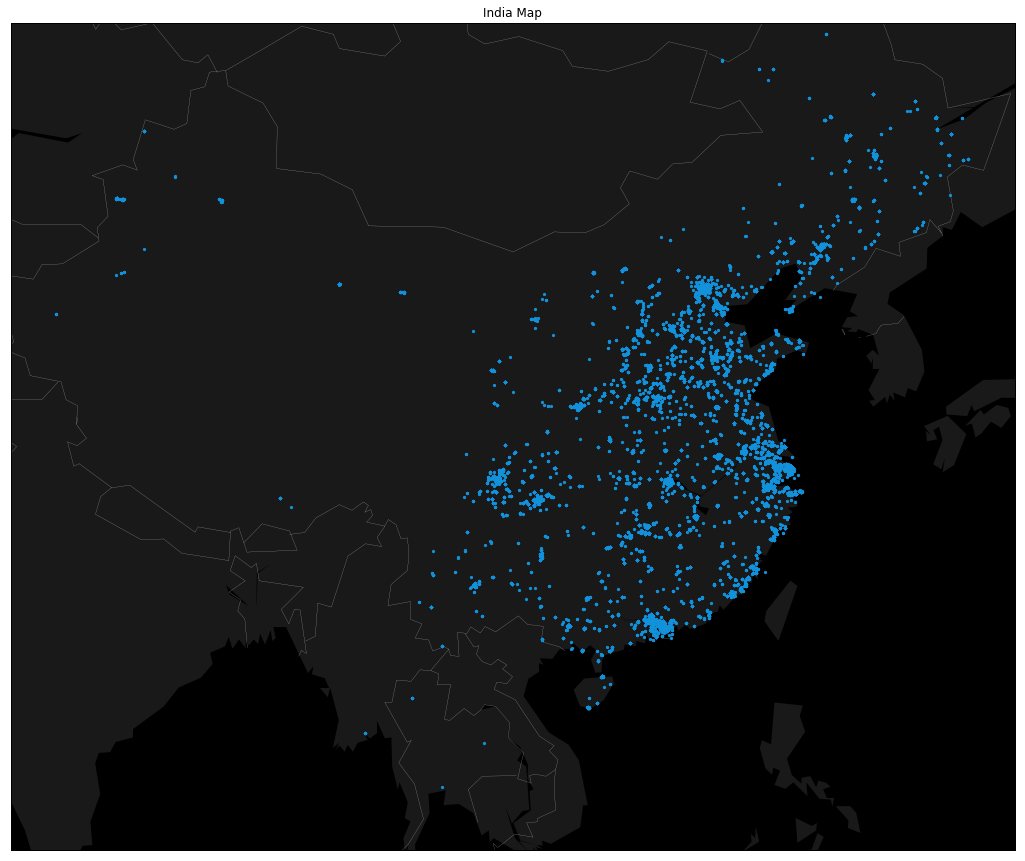

In [30]:
## The above median value for latitude and longitude belongs to CHina region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df[temp_df['Gender']=='F']["Longitude"].tolist(), temp_df[temp_df['Gender']=='F']["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India Map")
plt.show()

#### Visualization for different age groups

#### 0-24, 35-32, 36+

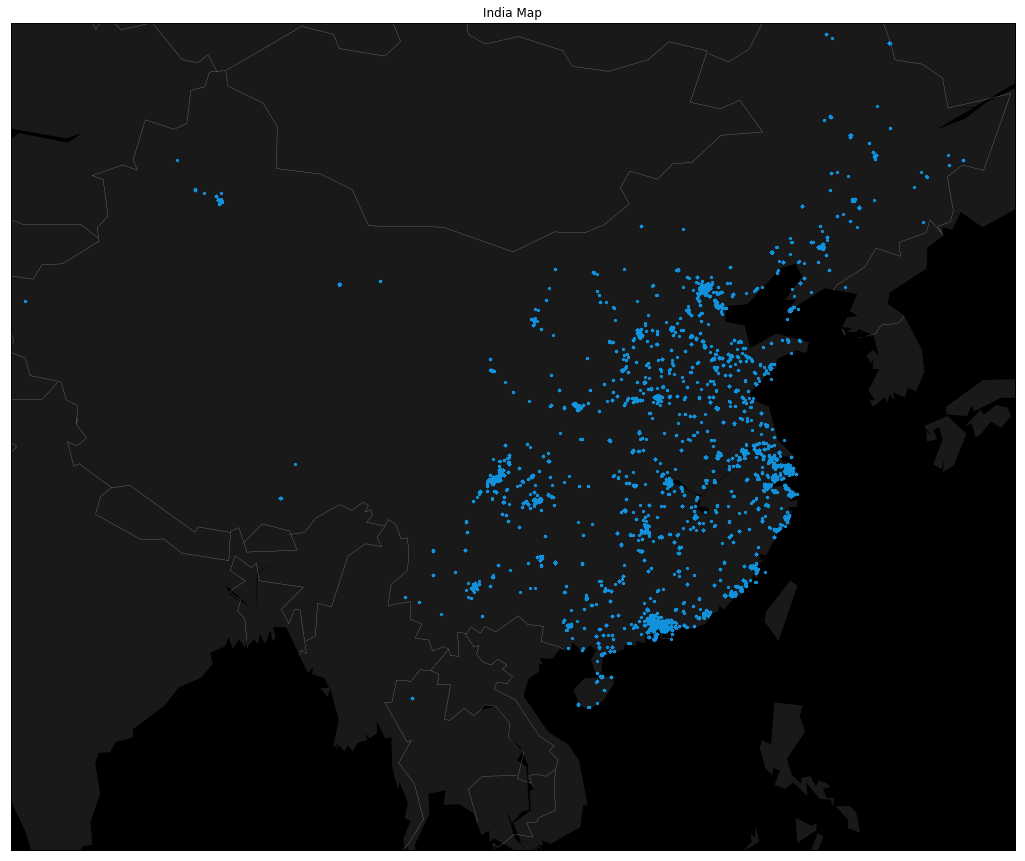

In [33]:
## The above median value for latitude and longitude belongs to CHina region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df[temp_df['Age_Group']=='0-24']["Longitude"].tolist(), temp_df[temp_df['Age_Group']=='0-24']["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India Map")
plt.show()

#### For age Group, 25-32

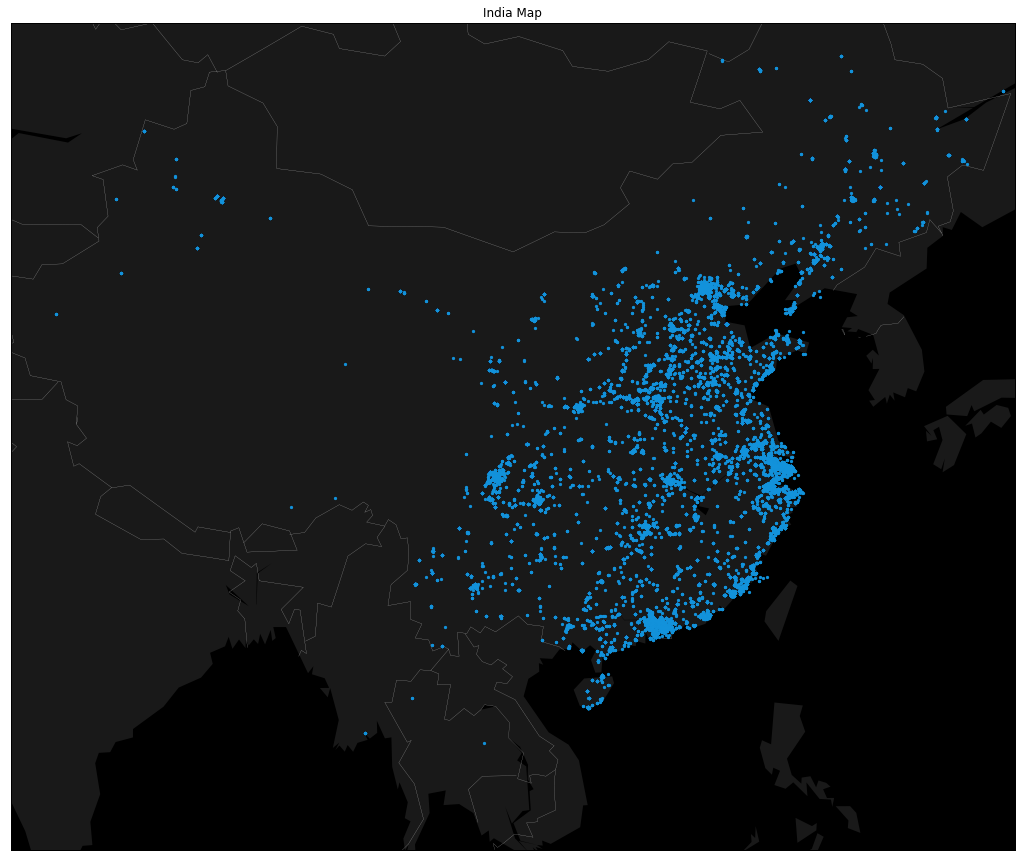

In [35]:
## The above median value for latitude and longitude belongs to CHina region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df[temp_df['Age_Group']=='25-32']["Longitude"].tolist(), temp_df[temp_df['Age_Group']=='25-32']["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India Map")
plt.show()

#### For Age Group, 36+

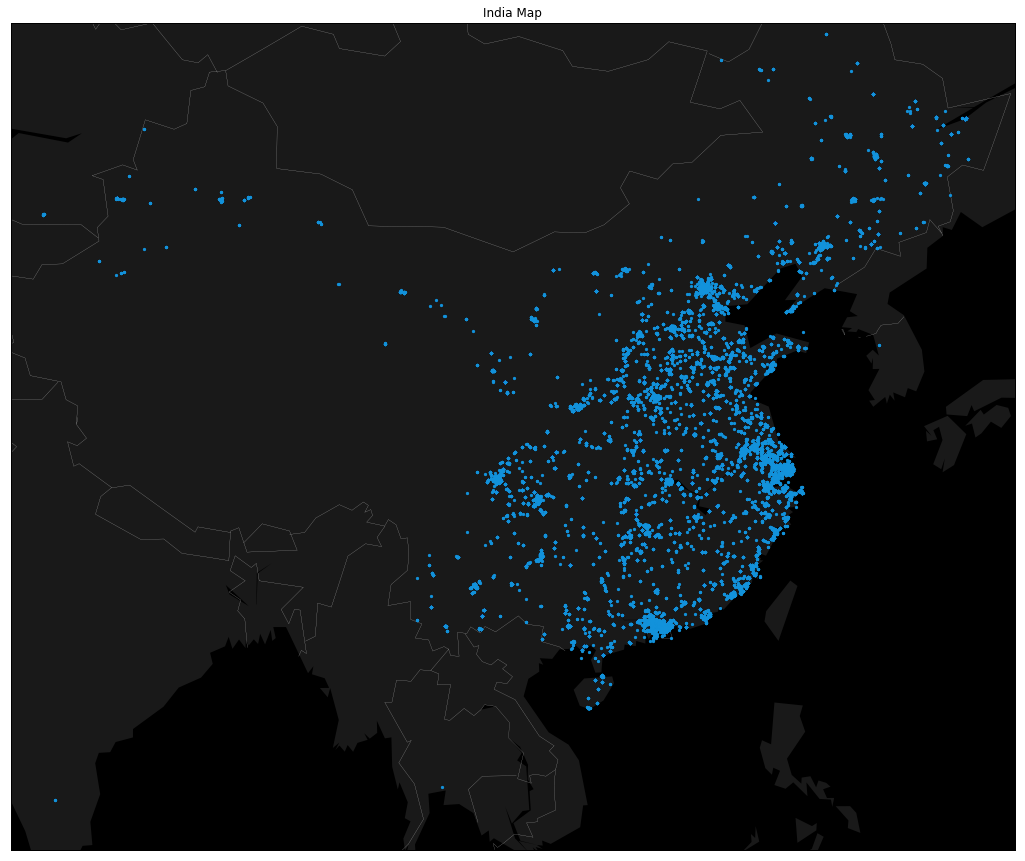

In [34]:
## The above median value for latitude and longitude belongs to CHina region
## therefeore using the values of china map in basemap for visualization
fig = plt.figure(figsize=(18, 18))

# Mercator of World
m = Basemap(projection='merc',
             llcrnrlat=10,  #latitude of lower left hand corner of the desired map domain
             urcrnrlat=51, #latitude of upper right hand corner of the desired map domain
             llcrnrlon=75, #longitude of lower left hand corner of the desired map domain
             urcrnrlon=135, #longitude of upper right hand corner of the desired map domain
             lat_ts=0, #latitude of true scale
             resolution='c') #resolution of boundary dataset being used - c for crude


m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.15, color="w")              # thin white line for country borders

# Plot the data
mxy = m(temp_df[temp_df['Age_Group']=='32+']["Longitude"].tolist(), temp_df[temp_df['Age_Group']=='32+']["Latitude"].tolist())
m.scatter(mxy[0], mxy[1], s=5, c="#1292db", zorder=2)    # zorder for the points  

plt.title("India Map")
plt.show()